In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports_2.csv')
events = pd.read_csv('events_US_2.csv')
fares = pd.read_csv('fares.csv')
flight_traffic = pd.read_csv('flight_traffic.csv')
stock_prices = pd.read_csv('stock_prices.csv')
weather = pd.read_csv('weather.csv')

In [3]:
airlines.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [4]:
fares = fares.merge(airlines, left_on='airline_id', right_on='airline_id')

In [5]:
airports.head()

,airport_id,airport_name,city,state,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,31.53552,-84.19447


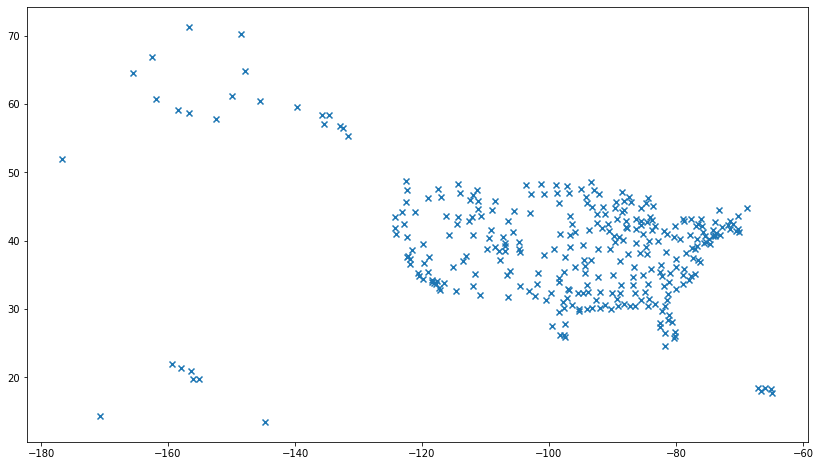

In [6]:
plt.figure(figsize=(14, 8))
plt.scatter(airports['longitude'], airports['latitude'], marker='x')


In [7]:
airports = airports.dropna()
cities = airports['city'].unique()
longs = []
lats = []
cits = []
for city in cities: 
    tmp = airports[airports['city'] == city]
    lats.append(tmp['latitude'].mean())
    longs.append(tmp['longitude'].mean())
    cits.append(city)
cities = pd.DataFrame({'city':cits, 'latitude':lats, 'longitude':longs})
cities.head()

,city,latitude,longitude
0,Allentown,40.65236,-75.440400
1,Abilene,32.41132,-99.681900
2,Albuquerque,35.04022,-106.609190
3,Aberdeen,45.44906,-98.421830
4,Albany,37.14182,-78.998725


In [8]:
event_city_data = []
for city in events['city']:
    tmp = cities[cities['city'] == city]
    if len(tmp['longitude']) > 0:
        event_city_data.append([tmp['latitude'].iloc[0], tmp['longitude'].iloc[0]])
event_city_data = np.array(event_city_data)

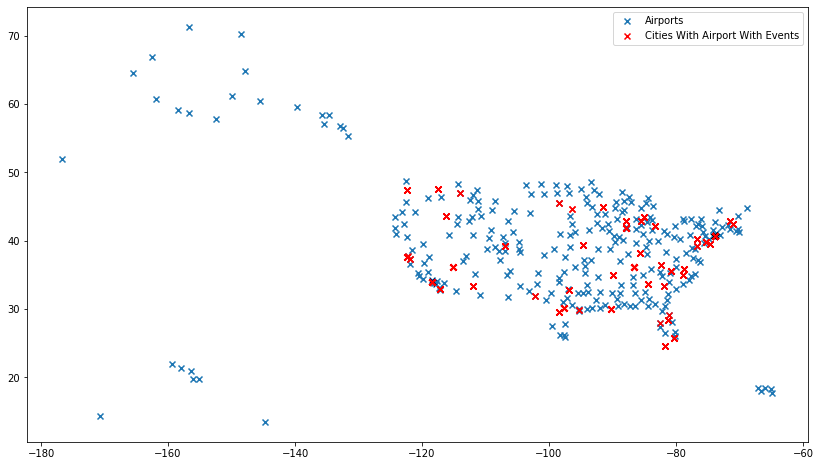

In [9]:
plt.figure(figsize=(14, 8))
plt.scatter(airports['longitude'], airports['latitude'], marker='x', label='Airports')
plt.scatter(event_city_data[:, 1], event_city_data[:, 0], marker='x', c='r', label='Cities With Airport With Events')
plt.legend()

In [10]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2420,2430,2440,2450,2460,2470,2480,2490,2500,airline_name
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
1,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
2,1,AA,CLT,TPA,507,114,225,527,822,835,...,0,0,0,0,0,0,0,0,2,American Airlines Inc.
3,1,AA,DFW,IND,761,23,39,33,61,130,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
4,1,AA,DFW,MHK,431,12,33,70,78,74,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.


In [11]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2420,2430,2440,2450,2460,2470,2480,2490,2500,airline_name
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
1,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
2,1,AA,CLT,TPA,507,114,225,527,822,835,...,0,0,0,0,0,0,0,0,2,American Airlines Inc.
3,1,AA,DFW,IND,761,23,39,33,61,130,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.
4,1,AA,DFW,MHK,431,12,33,70,78,74,...,0,0,0,0,0,0,0,0,0,American Airlines Inc.


In [12]:
inds = np.arange(1, 251)*10
fare = 0
for price in inds:
    fare += (price + 5)*fares[str(price)]
fares['sum_fares'] = fare

In [13]:
summed_fares = fares.groupby(['airline_name']).sum()['sum_fares']
summed_fares

airline_name
Aer Lingus Limited                                        880
Aerovias del Continente Americano S.A. Avianca            100
Air Canada                                               1405
Air France                                               3305
Air New Zealand Limited                                  5945
Alaska Airlines Inc.                                846539340
All Nippon Airways Co. Ltd.                              1000
Allegiant Air LLC                                   257395005
American Airlines Inc.                             3136590900
Asiana Airlines Inc.                                       65
Boutique Air Inc.                                       49415
British Airways p.l.c.                                   2265
Brussels Airlines                                         435
Champlain Enterprises Inc.                                 30
China Southern Airlines                                   355
Corvus Airlines Inc.                                    9

In [14]:
summed_fares.sort_values(ascending=False)

airline_name
American Airlines Inc.                             3136590900
Southwest Airlines Co.                             2925370055
Delta Air Lines Inc.                               2859070055
United Airlines Inc.                               2506054860
Alaska Airlines Inc.                                846539340
Jetblue Airways Corporation                         755559595
Spirit Airlines                                     519918215
Frontier Airlines Inc.                              415379510
Allegiant Air LLC                                   257395005
Hawaiian Airlines Inc.                              232790325
Virgin America Inc.                                 218185385
MN Airlines LLC                                      64149650
Island Air                                            1462700
SkyWest Airlines                                      1373170
Silver Airways Corp.                                   353570
Penair                                                 26

In [15]:
stock_prices['timestamp']

0       4/6/18
1       4/5/18
2       4/4/18
3       4/3/18
4       4/2/18
        ...   
375    10/7/16
376    10/6/16
377    10/5/16
378    10/4/16
379    10/3/16
Name: timestamp, Length: 380, dtype: object

In [16]:
flight_traffic.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [17]:
def year_to_str(yr): 
    yr = str(yr)
    return yr[-2:]

In [18]:
flight_traffic['timestamp'] = flight_traffic['month'].apply(str) + '/' + flight_traffic['day'].apply(str) + '/' +  flight_traffic['year'].apply(year_to_str)

In [19]:
flight_traffic

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,timestamp
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN,1/31/17
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1/12/17
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,...,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN,1/14/17
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,...,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1/18/17
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,...,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN,1/25/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567668,2017,12,17,UA,IAH,LGA,1624,1619.0,14.0,1633.0,...,0,210.0,183.0,1416,NaN,NaN,NaN,NaN,NaN,12/17/17
567669,2017,12,17,UA,IAH,PBI,2000,2000.0,20.0,2020.0,...,0,154.0,141.0,956,NaN,NaN,NaN,NaN,NaN,12/17/17
567670,2017,12,17,UA,CLE,ORD,740,733.0,28.0,801.0,...,0,95.0,90.0,316,NaN,NaN,NaN,NaN,NaN,12/17/17
567671,2017,12,17,UA,DEN,MSP,1253,1246.0,12.0,1258.0,...,0,115.0,105.0,680,NaN,NaN,NaN,NaN,NaN,12/17/17


In [20]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [21]:
weather['datetime'][0].split('T')
w = weather['datetime'][0].split('T')[1]
w.split(':')

['00', '54', '00']

In [22]:
def weather_to_date(w):
    date = w.split('T')[0]
    year, month, day = date.split('-')
    year, month, day = int(year), int(month), int(day)
    year -= 2000
    return str(month) + '/' + str(day) + '/' + str(year)

def weather_to_time(w):
    time = w.split('T')[1]
    return time

In [23]:
weather['timestamp'] = weather['datetime'].apply(weather_to_date)

In [28]:
weather['time'] = weather['datetime'].apply(weather_to_time)

In [29]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status,timestamp,time
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN,1/1/17,00:54:00
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN,1/1/17,06:54:00
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0,1/1/17,12:54:00
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0,1/1/17,18:54:00
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN,1/2/17,00:54:00


In [43]:
flight_traffic_stock_prices = flight_traffic.merge(stock_prices, left_on = 'timestamp', right_on =  'timestamp')

In [44]:
weather_stock_prices = weather.merge(stock_prices, left_on = 'timestamp', right_on =  'timestamp')

In [45]:
list(flight_traffic_stock_prices.columns) 

['year',
 'month',
 'day',
 'airline_id',
 'origin_airport',
 'destination_airport',
 'scheduled_departure',
 'actual_departure',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'scheduled_arrival',
 'actual_arrival',
 'cancelled',
 'diverted',
 'scheduled_elapsed',
 'actual_elapsed',
 'distance',
 'airline_delay',
 'weather_delay',
 'air_system_delay',
 'security_delay',
 'aircraft_delay',
 'timestamp',
 'AA',
 'UA',
 'B6',
 'OO',
 'AS',
 'NK',
 'WN',
 'DL',
 'HA']

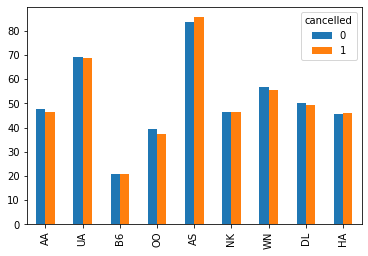

In [82]:
x = flight_traffic_stock_prices.groupby('cancelled').mean()
xx = x[['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']]
y = xx.transpose()
y[[0,1]].plot(kind='bar')
#y[0, 1].plot(kind='bar')
#y[['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']].plot(kind='bar')

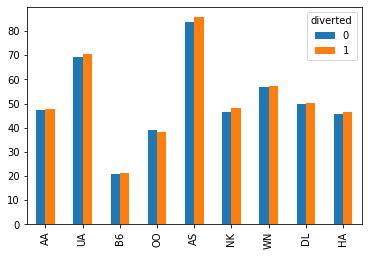

In [83]:
x = flight_traffic_stock_prices.groupby('diverted').mean()
xx = x[['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']]
y = xx.transpose()
y[[0,1]].plot(kind='bar')

In [48]:
flight_traffic_stock_prices.groupby('diverted').mean()

,year,month,day,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,...,aircraft_delay,AA,UA,B6,OO,AS,NK,WN,DL,HA
diverted,,,,,,,,,,,,,,,,,,,,,
0,2017.0,6.559672,15.826624,1329.345615,1333.206634,16.976160,1355.638157,1462.331333,7.497297,1487.379651,...,25.508169,47.518602,69.229735,20.967399,39.212273,83.783896,46.618129,56.789930,49.988211,45.677256
1,2017.0,6.156909,15.038642,1347.296253,1371.135991,19.576788,1399.153576,1499.488858,8.926184,1561.459016,...,NaN,47.696885,70.635117,21.285386,38.235310,85.648501,48.070410,57.149496,50.193648,46.595931
